In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from utils import *
from text_preprocessing import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import string
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30,15]
import nltk
nltk.download('words')
from nltk.corpus import stopwords 
nltk.download('stopwords')
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

from collections import Counter        
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from wordcloud import WordCloud

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\WBurke\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WBurke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


E:\Projects\bitbucket\fancy-a-challenge-william\utils.py:21: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.





df shape:  (3000, 9)

rows with null values:  Int64Index([1551, 1552], dtype='int64')
rows that arent twitter:  1

dropped one row, fixed other null by dropping platform col, as unneeded

type of friends col:  int32

 country breakdown:  GB    2991
GG       5
JE       2
IM       1
Name: location.country, dtype: int64

df shape:  (2999, 8)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,location.latitude,location.longitude,properties.sentiment
0,1689,22566.0,False,Can't believe I'm missing Love Island 😩,GB,51.570448,0.457135,1.0
1,114,1377.0,False,Last tweet about future wedding..... if I actu...,GB,52.969744,-1.172266,1.0
2,568,8375.0,False,"How many times does he wonna say the phrase ""i...",GB,51.394369,0.026299,-1.0
3,1845,19394.0,False,...even better if time travel were invented an...,GB,51.648544,-3.804292,-1.0
4,1617,17922.0,False,@GreenAlty @ShakeyStephens My Mum in mid 80s p...,GB,53.543471,-2.653238,0.0


,author.properties.friends,author.properties.status_count,location.latitude,location.longitude,properties.sentiment
count,2999.000000,2.999000e+03,2999.000000,2999.000000,2999.000000
mean,1320.079693,3.513996e+04,52.750163,-1.607843,-0.258419
std,8246.171997,1.291825e+05,1.655964,1.641746,0.781440
min,0.000000,2.000000e+00,49.187014,-7.817143,-1.000000
25%,260.500000,3.427500e+03,51.497043,-2.675644,-1.000000
50%,526.000000,1.143500e+04,52.200984,-1.396467,0.000000
75%,1081.500000,3.046100e+04,53.690849,-0.182814,0.000000
max,333028.000000,1.702464e+06,58.166389,1.403889,1.000000


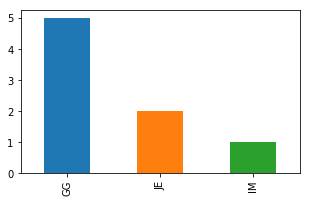

In [2]:
combined_df = preprocess_values(load_combined_df())
combined_df.head()
plt.rcParams['figure.figsize'] = [5,3]
combined_df['location.country'][combined_df['location.country']!='GB'].value_counts().plot(kind='bar')
combined_df.describe()

In [3]:
#googling these lon/lats show GG means Guersney.  (could also be done with google reverse geocoding api.)
combined_df[combined_df['location.country']=='GG']

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,location.latitude,location.longitude,properties.sentiment
536,2749,6387.0,False,@Jigman101 @VirtualAstro sadly not Lemon Drizz...,GG,49.571653,-2.417006,1.0
637,513,3311.0,False,@KimPye1983 I thought so. 😂😂,GG,49.460338,-2.542239,-1.0
1082,5090,670875.0,False,@Siriuo topic similar @ChronolabsCoop this art...,GG,49.433300,-2.650000,0.0
2266,599,5406.0,False,@diggs70 30 years ago probably the norm 🙈,GG,49.571653,-2.417006,-1.0
2841,1,18334.0,False,"23:47 BST: Temp: 13.0°C,\nWind: N, 2 mph (ave)...",GG,49.477000,-2.578000,0.0


It is hard to argue, from the following graph, that location is a big factor in the final sentiment score of the tweet, which logically makes sense.

Interesting to note that all tweets are between longitude -2.7 and 1.4 and latitude 49 and 59. So this a rather limited region.  We notice all the tweets are from the UK, mostly Great Britain(GB), with 2 from Jersey(JE), 5 from Guernsey(GE), one from Isle of Man(IM).


Running PCA again ...


Text(0.5,1,'Scatter plot of the training data projected on the 1st and 2nd principal components')

Text(0.5,0,'latitude')

Text(0,0.5,'longitude')

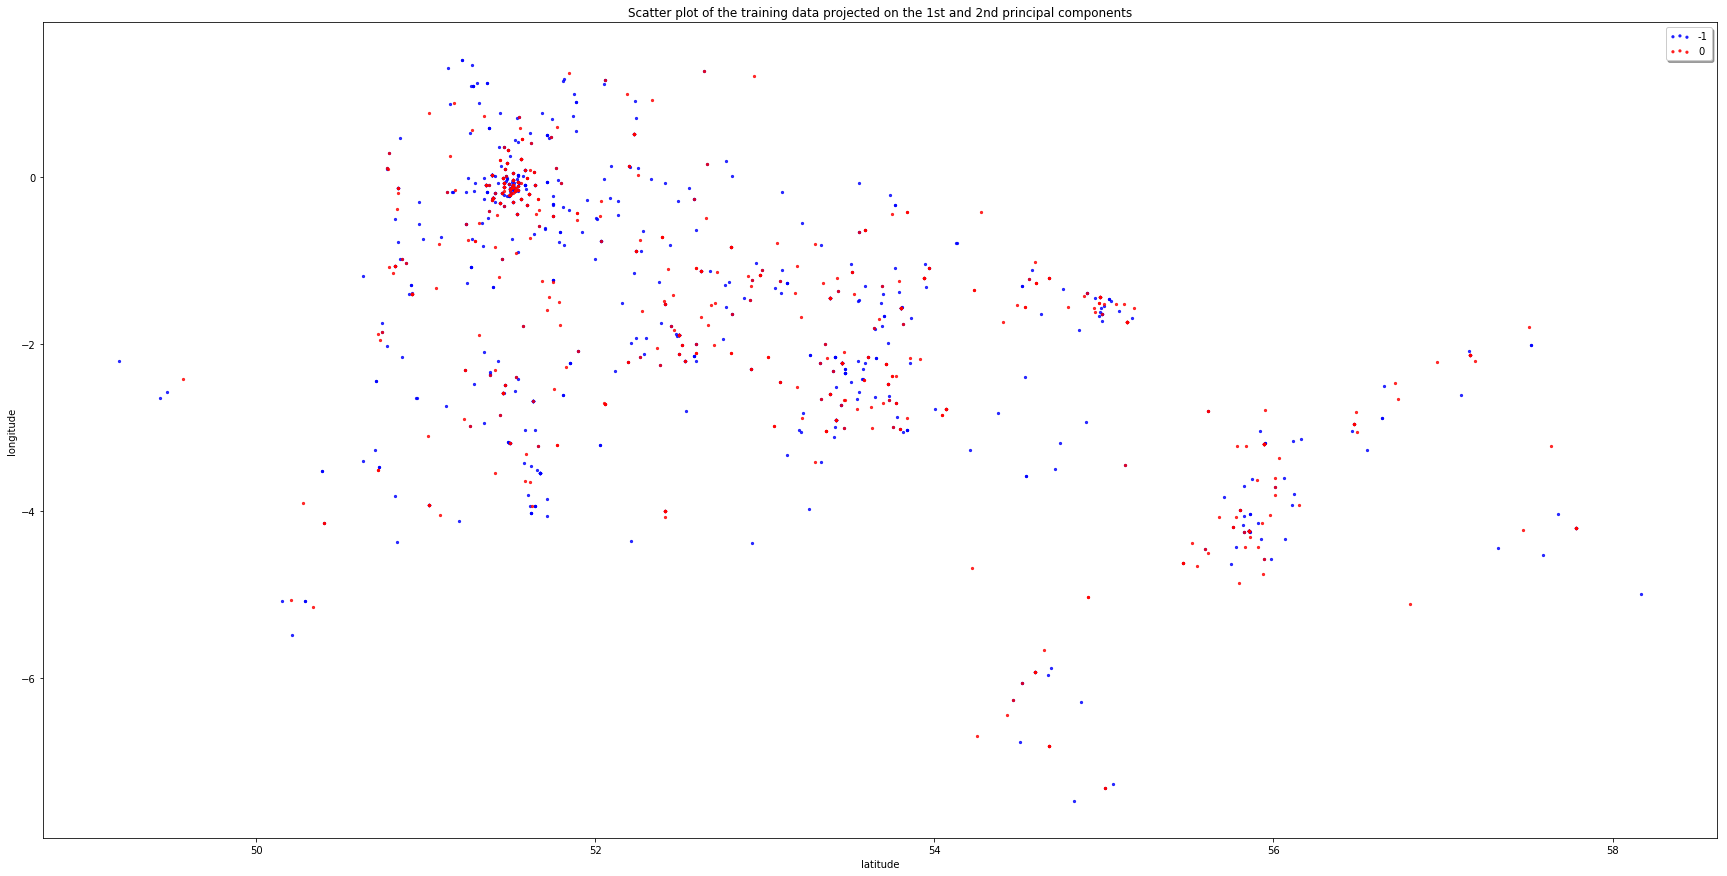

In [4]:
geo_array = np.array(combined_df[['location.latitude','location.longitude']])

print('\nRunning PCA again ...')
label_col = "properties.sentiment"
y_normal = combined_df[label_col].values.astype(np.int8)
target_names = np.unique(y_normal)

colors = ['blue', 'red']
plt.rcParams['figure.figsize'] = [30,15]

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(geo_array[y_normal == i, 0], geo_array[y_normal == i, 1], color=color, s=20,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=True, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("latitude")
plt.ylabel("longitude")

#plt.savefig('pca-porto-01.png', dpi=150)
plt.show()

In [5]:
#encode country and verified cols
combined_df = encode_labels(combined_df,['author.properties.verified','location.country'])


encoded: author.properties.verified
encoded: location.country


In [6]:
no_body_df = normalize(encode_labels(combined_df.drop(['content.body','location.country','location.latitude','location.longitude'],axis=1),['author.properties.verified']))

print('\nRunning PCA again ...')
label_col = "properties.sentiment"
y_normal = no_body_df[label_col].values.astype(np.int8)

colors = ['blue', 'red']

n_comp = len(no_body_df.drop([label_col],axis=1).columns)

print(f'There were {n_comp} components to begin with: {", ".join(no_body_df.drop([label_col],axis=1).columns)}')
target_names = np.unique(y_normal)
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(no_body_df.drop([label_col],axis=1).values)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

encoded: author.properties.verified

Running PCA again ...
There were 3 components to begin with: author.properties.friends, author.properties.status_count, author.properties.verified
Explained variance: 1.0000


Individual variance contributions:
0.5444343185734773
0.4118780176549874
0.043687663771535316


Text(0.5,1,'Scatter plot of the training data projected on the 1st and 2nd principal components')

Text(0.5,0,'Principal axis 1 - Explains 54.4 % of the variance')

Text(0,0.5,'Principal axis 2 - Explains 41.2 % of the variance')

Correlation with sentiment: 
 ---------------------
author.properties.friends: 0.024300949979256373
author.properties.status_count: 0.03636783031129115
author.properties.verified: 0.03886120752344499


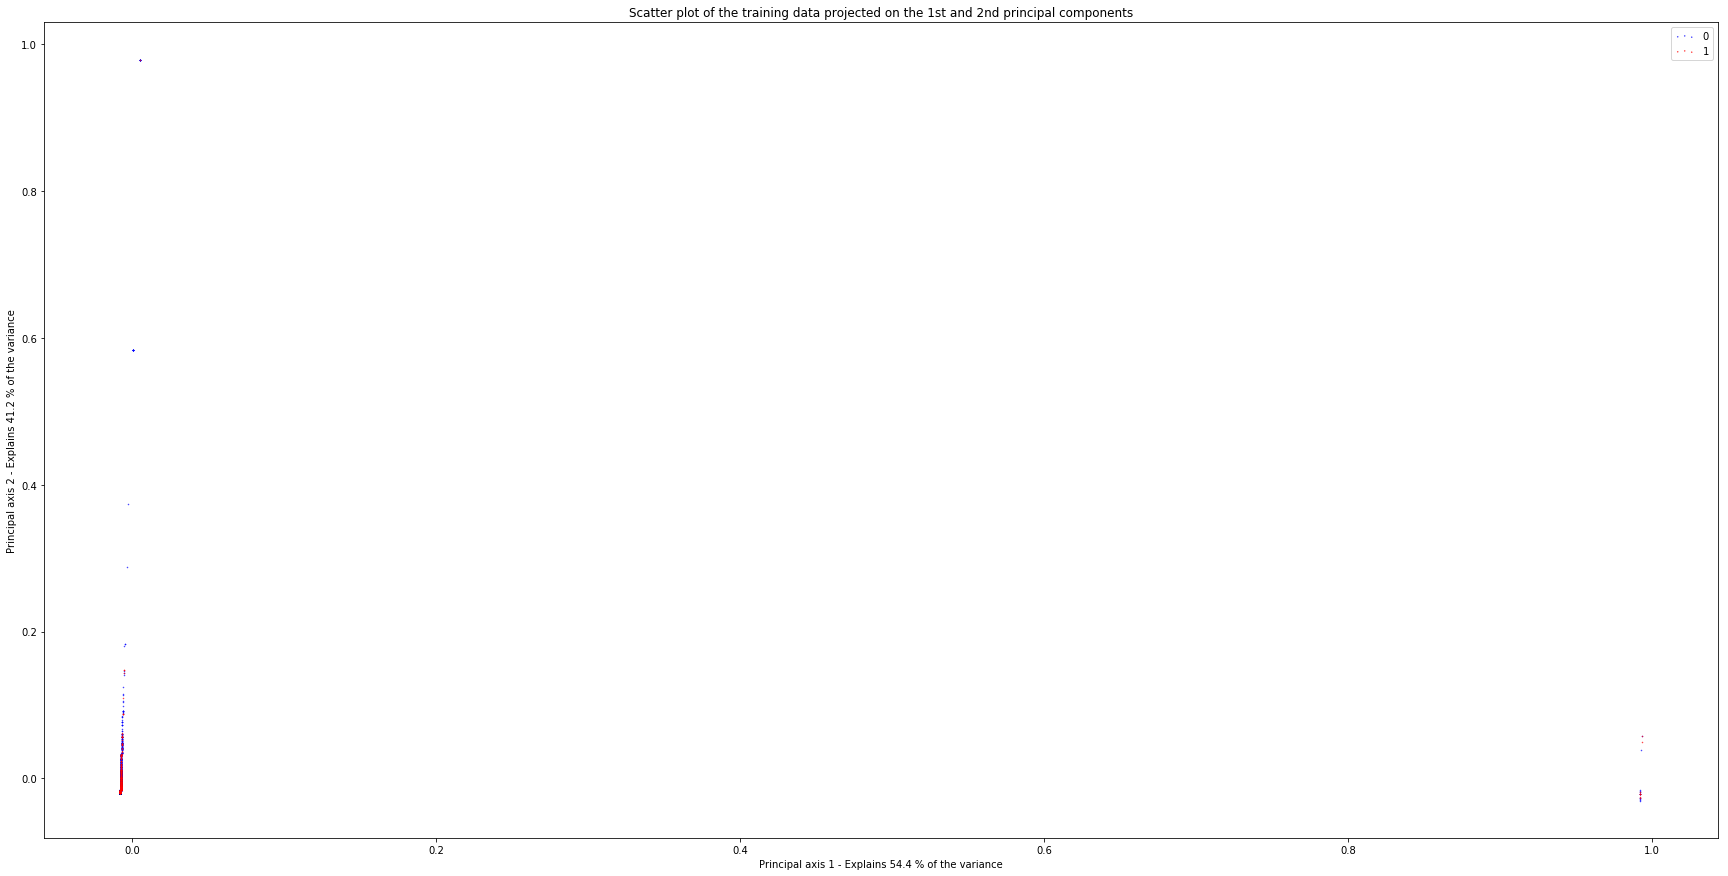

In [7]:
print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

colors = ['blue', 'red']
plt.rcParams['figure.figsize'] = [30,15]

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y_normal == i, 0], X_pca[y_normal == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

print("Correlation with sentiment: \n ---------------------")
for col in no_body_df.drop([label_col],axis=1):
    print(f"{col}: {no_body_df[col].corr(no_body_df[label_col])}")

plt.show()

It seems from this initial look, it cannot fully be determined with the sentiment is positive or negative based solely on metadata, therefore it will be necessary to analyse body of the tweets.

While the location data does not seem meaningful, these 3 features could add a little bit to the model.

In [8]:

#add features
#ignore I and A which could be normal words
combined_df["count_words_upper"] = combined_df["content.body"].apply(lambda x: len([w for w in str(x).split() if w.isupper() and w not in ["I","A"]]))

combined_df['count_sent']=combined_df["content.body"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
combined_df['count_word']=combined_df["content.body"].apply(lambda x: len(str(x).split()))
#sentence count
combined_df['count_sent']=combined_df["content.body"].apply(lambda x: len(re.findall("\n",str(x))))

#exclamation count
combined_df['count_exclamation']=combined_df["content.body"].apply(lambda x: len(re.findall("!",str(x))))

#usertag count
combined_df['count_user_tags']=combined_df["content.body"].apply(lambda x: len(re.findall('@[^\s]+',str(x))))

#hash count
combined_df['count_hash']=combined_df["content.body"].apply(lambda x: len(re.findall(r'#([^\s]+)',str(x))))

#url count
combined_df['count_url']=combined_df["content.body"].apply(lambda x: len(re.findall('((www\.[^\s]+)|(https?://[^\s]+))',str(x))))
combined_df.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,location.latitude,location.longitude,properties.sentiment,count_words_upper,count_sent,count_word,count_exclamation,count_user_tags,count_hash,count_url
0,1689,22566.0,0,Can't believe I'm missing Love Island 😩,0,51.570448,0.457135,1.0,0,0,7,0,0,0,0
1,114,1377.0,0,Last tweet about future wedding..... if I actu...,0,52.969744,-1.172266,1.0,1,0,26,0,0,0,0
2,568,8375.0,0,"How many times does he wonna say the phrase ""i...",0,51.394369,0.026299,-1.0,0,0,14,0,0,1,0
3,1845,19394.0,0,...even better if time travel were invented an...,0,51.648544,-3.804292,-1.0,0,0,22,0,0,1,0
4,1617,17922.0,0,@GreenAlty @ShakeyStephens My Mum in mid 80s p...,0,53.543471,-2.653238,0.0,5,0,24,0,2,0,0


Comments skewed towards negative.  Verified users tend to give more positive comments, but only 23 users are verified, 0.7% of dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E476551390>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E478D28908>]],
      dtype=object)

0    2976
1      23
Name: author.properties.verified, dtype: int64

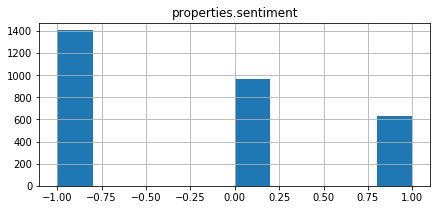

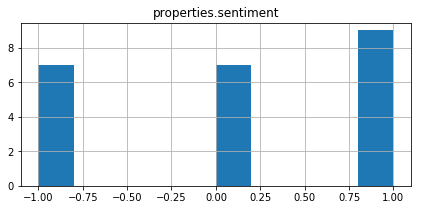

In [9]:
target = "properties.sentiment"
plt.rcParams['figure.figsize'] = [7,3]
combined_df.hist(column=target)

combined_df[combined_df["author.properties.verified"]==1].hist(column=target)
combined_df["author.properties.verified"].value_counts()

Many of the features I have created about the text, show generally that more words, punctuation, uppercase use,
hashes, tags, etc. tend to mean that the comment is less neutral and more positive or negative, but it could
be either.

Analysis could be done on number of ! or ?, etc, but I assume this
will give much the same information.

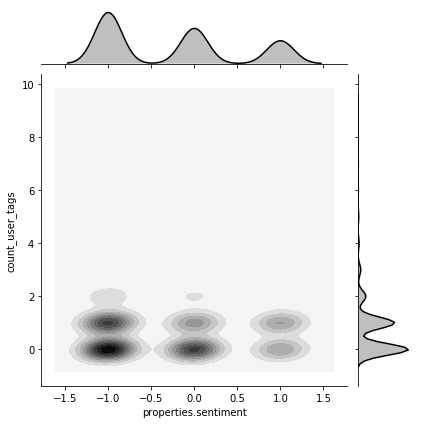

In [10]:
sns.jointplot( x=combined_df[target], y=combined_df["count_user_tags"],kind="kde", color="k")


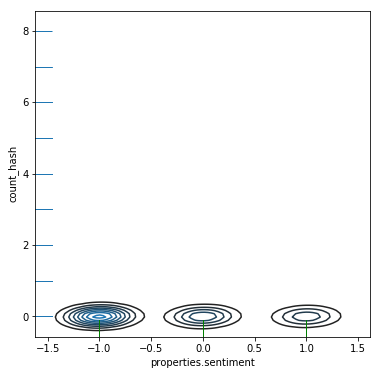

In [11]:
x=combined_df[target]
y=combined_df["count_hash"]

f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(x, y, ax=ax)
sns.rugplot(x, color="g", ax=ax)
sns.rugplot(y, vertical=True, ax=ax);

It seems amount of friends could be put in bins 

People with a lot friends seem slighlty more positive.

max friends:  333028


(array([  5.,   0.,   0.,   3.,   0.,   4.,   0.,   0.,   1.,   8.,   1.,
          1.,  18.,   3.,   1.,   5.,   7.,   2.,  14.,  19.,  18.,  23.,
         43.,  71.,  67.,  70., 161., 124., 189., 161., 217., 239., 210.,
        202., 200., 219., 103., 106., 120., 145.,  61.,  41.,  30.,  27.,
          7.,   4.,   3.,   6.,   6.,   1.,   5.,   1.,   0.,   0.,   0.,
          0.,   3.,   0.,   2.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([1.00000000e+00, 1.21607753e+00, 1.47884455e+00, 1.79838962e+00,
        2.18698120e+00, 2.65953868e+00, 3.23420522e+00, 3.93304429e+00,
        4.78288676e+00, 5.81636110e+00, 7.07314602e+00, 8.60149391e+00,
        1.04600834e+01, 1.27202724e+01, 1.54688374e+01, 1.88113055e+01,
        2.28760058e+01, 2.78189965e+01, 3.38300564e+01, 4.11399713e+01,
        5.00293946e+01, 6.08396223e+01, 7.39856974e+01, 8.99723438e+01,
        1.09413345e+02, 1.33055110e+02, 1.61805329e+02, 1.96767824e+02,
        2.39284929e+02, 2.90989024e+02, 3.53865213e+02, 

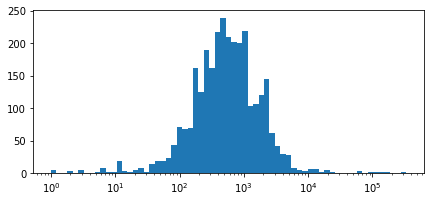

In [12]:
print('max friends: ',np.max(combined_df['author.properties.friends'].values))
data = combined_df['author.properties.friends'].values

_, bins = np.histogram(np.log10(data + 1), bins='auto')
plt.hist(data, bins=10**bins);
plt.gca().set_xscale("log")



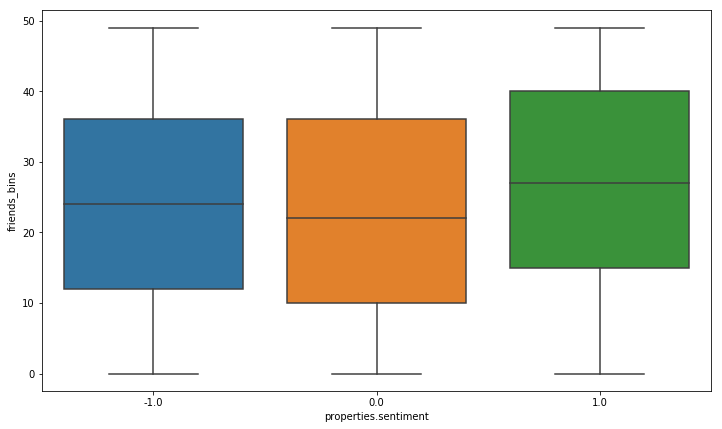

In [13]:
combined_df['friends_bins'] = pd.qcut(combined_df['author.properties.friends'], 50, labels=False)
plt.rcParams['figure.figsize'] = [12,7]
sns.boxplot( x=combined_df[target], y=combined_df["friends_bins"])

People with very many or very few friends use less tags and hashes.

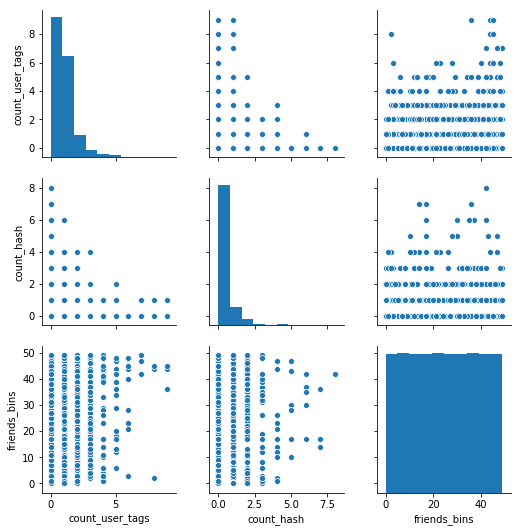

In [14]:
cols_train = ['count_user_tags','count_hash','friends_bins']
pair_df = combined_df[cols_train]
sns.pairplot(pair_df);

Many features do not give concrete info about target.

Most helpful seem to be exclamation points, but this may also
be considered a word in itself, and maybe too specific.
Such features cannot be created for each word in vocab.

c:\users\wburke\projects\venv36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



E:\Projects\bitbucket\fancy-a-challenge-william\utils.py:93: RuntimeWarning:

divide by zero encountered in log



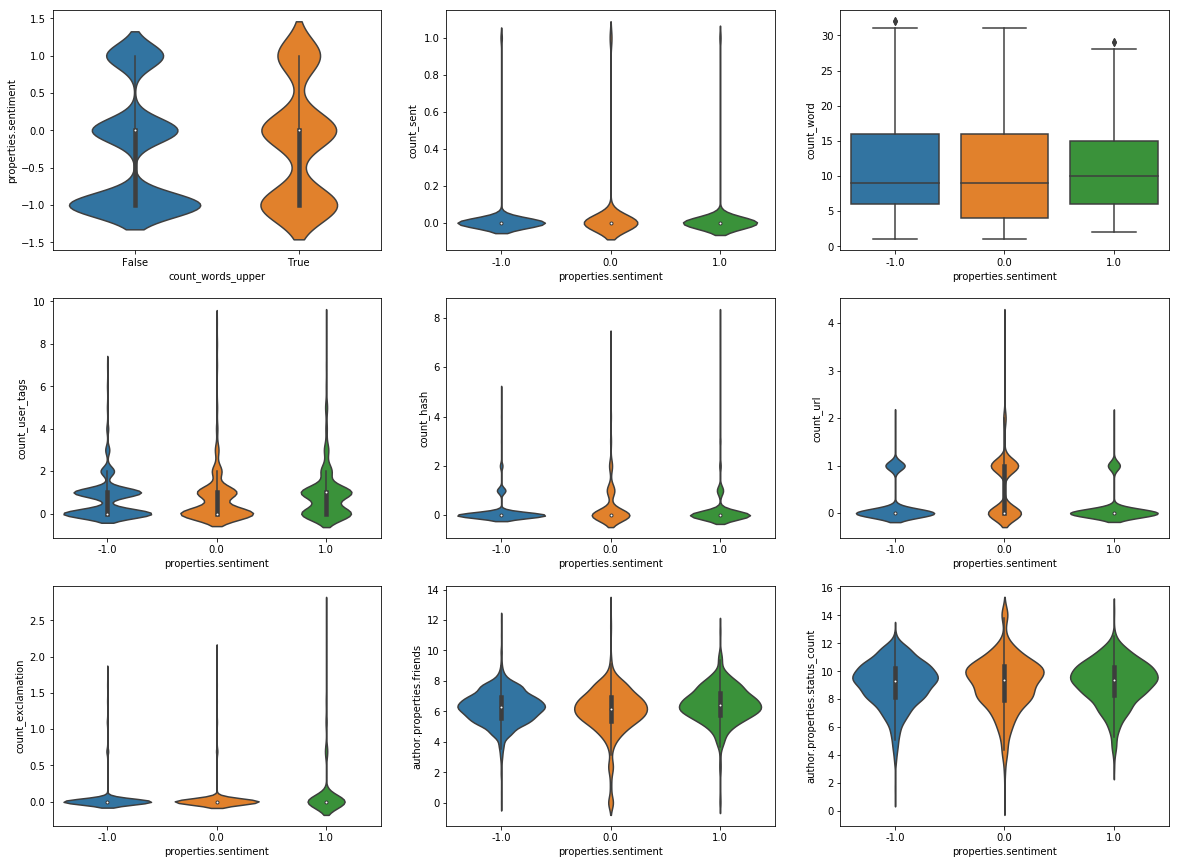

In [15]:
f, axes = plt.subplots(3, 3,figsize=(20,15))

plot_val = "count_words_upper"
sns.violinplot( y=combined_df[target], x=combined_df[plot_val]>0,ax=axes[0][0])

plot_val = "count_sent"
sns.violinplot( x=combined_df[target], y=combined_df[plot_val]>1,ax=axes[0][1] )

plot_val = "count_word"
sns.boxplot( x=combined_df[target], y=combined_df[plot_val],ax=axes[0][2] )

plot_val = "count_user_tags"
sns.violinplot( x=combined_df[target], y=combined_df[plot_val],ax=axes[1][0])

plot_val = "count_hash"
sns.violinplot( x=combined_df[target], y=combined_df[plot_val],ax=axes[1][1] )

plot_val = "count_url"
sns.violinplot( x=combined_df[target], y=combined_df[plot_val],ax=axes[1][2] )

#plot_val = "count_puncuation"
#sns.violinplot( x=combined_df[target], y=combined_df[plot_val], ax=axes[2][0])

plot_val = "count_exclamation"
sns.violinplot( x=combined_df[target], y=get_log(combined_df[plot_val]), ax=axes[2][0])


plot_val = get_log(combined_df["author.properties.friends"])
sns.violinplot( x=combined_df[target], y=plot_val, ax=axes[2][1])

plot_val = get_log(combined_df["author.properties.status_count"])
sns.violinplot( x=combined_df[target], y=plot_val, ax=axes[2][2])




Move towards nlp and create tokens

In [16]:
stops = set(stopwords.words('english') + ['uservariable','url','exclamation','face','hand','hands'])

def tokenizer(str_input):
    x = re.sub(r"[^A-Za-z0-9\-]", " ", preprocess_text_without_emojis(str_input)).lower().split()
    words = [w for w in x if w not in stops]
    return words

combined_df['tokens'] = combined_df['content.body'].apply(lambda x: tokenizer(x))

Here are the most common words for each sentiment.

Weather tweets are rather neutral, obviously.



In [17]:
word_counts = dict()
sents = [('neg',-1),('neut',0),('pos',1)]

for sent in sents:
    word_counts[sent[0]] = Counter()
    texts = combined_df[combined_df[target]==sent[1]]['tokens']
    for _, text in texts.iteritems():
        word_counts[sent[0]].update(text)
        
def most_common_words(kind, num_words=15):
    words, counts = zip(*word_counts[kind].most_common(num_words)[::-1])
    bars = go.Bar(
        y=words,
        x=counts,
        orientation="h"
    )
    layout = go.Layout(
        title="Most common words of the class \"{}\"".format(kind),
        yaxis=dict(
            ticklen=8  # to add some space between yaxis labels and the plot
        )
    )
    fig = go.Figure(data=[bars], layout=layout)
    iplot(fig, filename='bar')
    
most_common_words('pos')
most_common_words('neut')
most_common_words('neg')

Looking at words not in english dictionary (this is dictionary
from nltk, which is missing many words it should have such as
things, hours, heard).

In [18]:
def unusual_words(text):
    return set(text).difference(english_vocab)

def unusual_word_perc(text):
    if not text:
        return 0
    unusual = set(text).difference(english_vocab)
    return len(unusual)/len(text)

combined_df["unusual_words"] = combined_df["tokens"].apply(lambda x: set(x).difference(english_vocab))
combined_df["perc_non_english"] = combined_df["tokens"].apply(lambda x: unusual_word_perc(x))

<Figure size 864x504 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

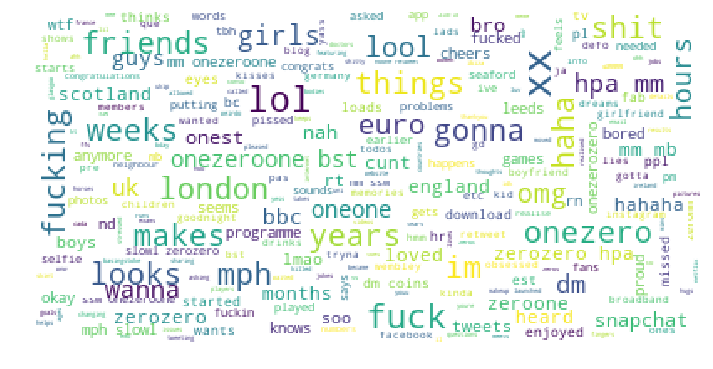

In [19]:
# Read the whole text.
text = ' '.join([word for row in combined_df['unusual_words'] for word in row])

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=25, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()